# In-class transcript from Lecture 13, February 27, 2019


# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


# Lecture starts here

Text(0.5,1,'flame ODE: ydot = y**2 - y**3')

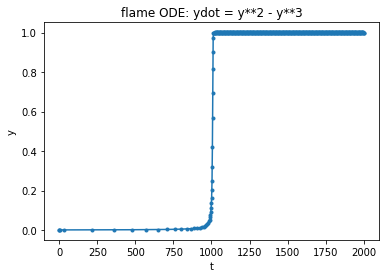

In [2]:
# demo of flame example with rk23

def flamef(t, y):
    """ODE describing the radius of a flame
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
      
    The ODE describes the growth of a flame of radius y,
    in terms of its oxygen balance. The flame takes in
    oxygen at a rate proportional to its surface area,
    and burns oxygen at a rate proportional to its volume:
      dy/dt = y**2 - y**3
    The flame balances at radius 1 (in these units), 
    so the exact solution increases monotonically from
    an initial radius delta < 1 to the asymptotic value.
    """
    ydot = y**2 - y**3
    return ydot

delta = .001
tspan = (0, 2/delta)
yinit = [delta]

sol = integrate.solve_ivp(fun = flamef, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('flame ODE: ydot = y**2 - y**3')

Text(0.5,1,'zoom on final stage')

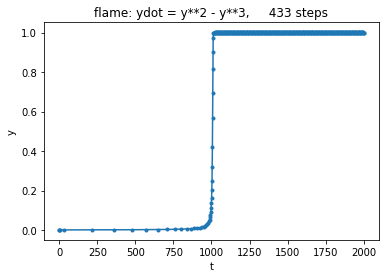

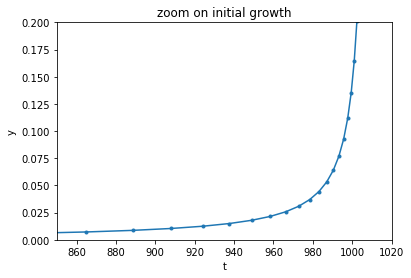

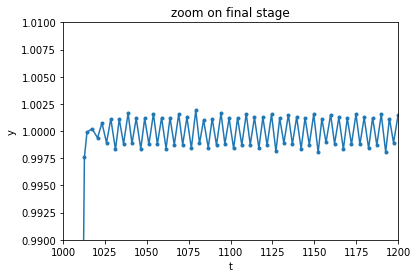

In [4]:
# zoom in on flame example with rk23

delta = .001
tspan = (0, 2/delta)
yinit = [delta]

sol = integrate.solve_ivp(fun = flamef, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('flame: ydot = y**2 - y**3,     %d steps' % len(sol.t))

plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.gca().set_ylim([0, .2])
plt.gca().set_xlim([850,1020])
plt.title('zoom on initial growth')

plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.gca().set_ylim([0.99, 1.01])
plt.gca().set_xlim([1000,1200])
plt.title('zoom on final stage')

Text(0.5,1,'valley walk, 1964 steps')

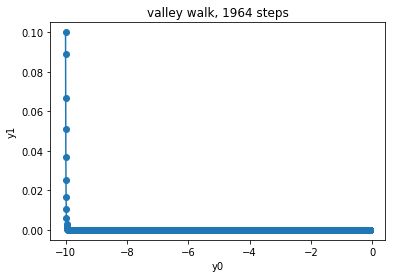

In [6]:
# demo of steepest-descent hiker with rk23

def valleyf(t, y):
    """ODE describing the path home in a valley in the fog
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
      
    You are somewhere in a long valley, whose altitude at
    position (y0, y1) is a(y0, y1) =  (y0/1000)**2 + y1**2. 

    There is a town at the bottom of the valley, at (0,0).

    To get to town, you want to walk downhill, 
    which is in the direction of the negative gradient, 

      - [da/dy0 , da/dy1]  =  - [y0/500 , 2*y1].

    You want to walk at constant speed, 
    so you scale ydot to have length 1.
    
    The differential equation is dy/dt = valleyf(t, y).
    """

    gradient = np.array([y[0]/500, 2*y[1]])
    ydot = - gradient / npla.norm(gradient)
    return ydot

tspan = (0, 10)
yinit = [-10, 0.1]  # try [-10, 0] and [-10, 0.1]

sol = integrate.solve_ivp(fun = valleyf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('valley walk, %d steps' % len(sol.t))

Text(0.5,1,'zoom on end of walk')

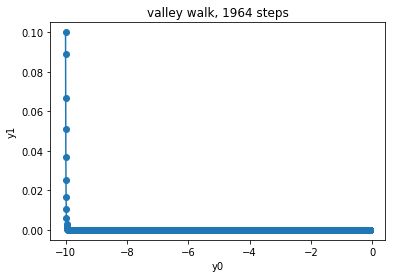

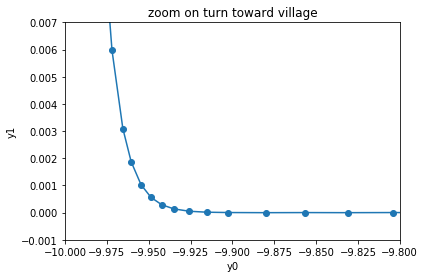

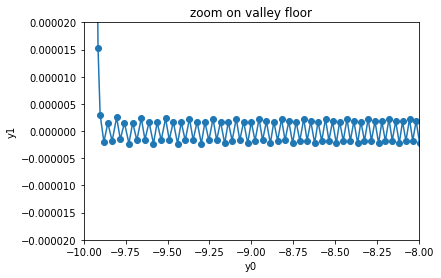

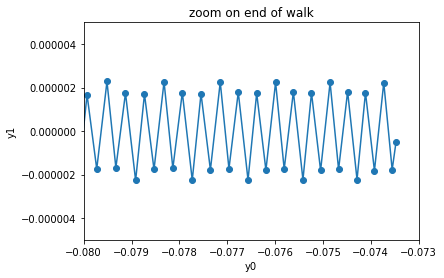

In [7]:
# zoom in on steepest-descent hiker with rk23

tspan = (0, 10)
yinit = [-10, 0.1]

sol = integrate.solve_ivp(fun = valleyf, t_span = tspan, y0 = yinit, method = 'RK23')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('valley walk, %d steps' % len(sol.t))

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.001, .007])
plt.gca().set_xlim([-10,-9.8])
plt.title('zoom on turn toward village')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.00002, .00002])
plt.gca().set_xlim([-10,-8.])
plt.title('zoom on valley floor')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.000005, .000005])
plt.gca().set_xlim([-.08,-.073])
plt.title('zoom on end of walk')


Text(0.5,1,'valley walk, 33 steps')

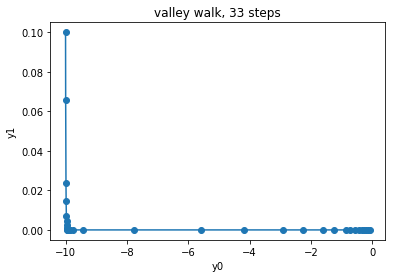

In [8]:
# demo of steepest-descent hiker with Radau (implicit stiff solver)

tspan = (0, 10)
yinit = [-10, 0.1]

sol = integrate.solve_ivp(fun = valleyf, t_span = tspan, y0 = yinit, method = 'Radau')

%matplotlib inline
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('valley walk, %d steps' % len(sol.t))

Text(0.5,1,'zoom on end of walk')

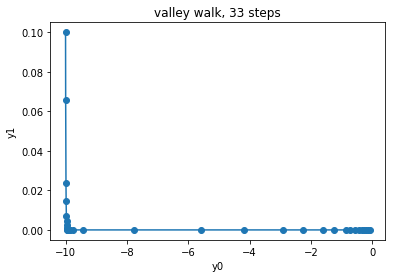

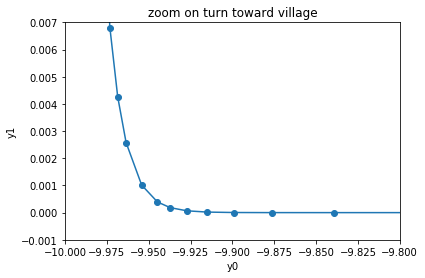

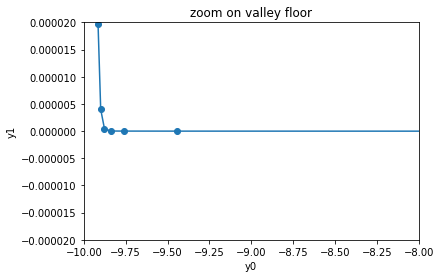

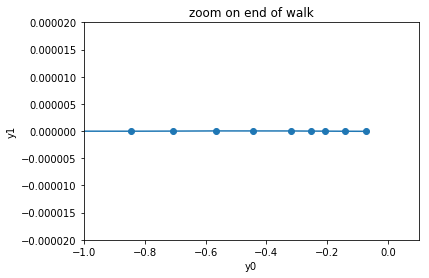

In [9]:
# zoom in on steepest-descent hiker with Radau 

tspan = (0, 10)
yinit = [-10, 0.1]

sol = integrate.solve_ivp(fun = valleyf, t_span = tspan, y0 = yinit, method = 'Radau')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('valley walk, %d steps' % len(sol.t))

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.001, .007])
plt.gca().set_xlim([-10,-9.8])
plt.title('zoom on turn toward village')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.00002, .00002])
plt.gca().set_xlim([-10,-8.])
plt.title('zoom on valley floor')

plt.figure()
plt.plot(sol.y[0], sol.y[1], 'o-', label='ode solution')
plt.xlabel('y0')
plt.ylabel('y1')
plt.gca().set_ylim([-.00002, .00002])
plt.gca().set_xlim([-1,0.1])
plt.title('zoom on end of walk')


Text(0.5,1,'zoom on final stage')

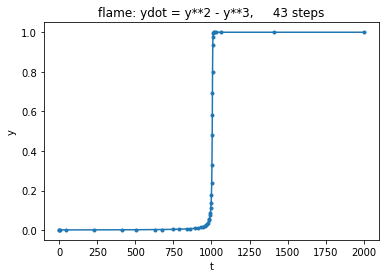

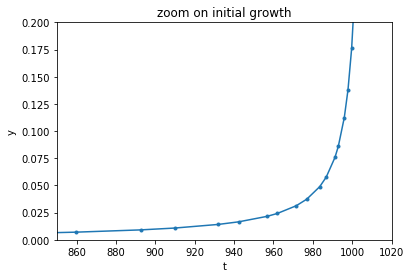

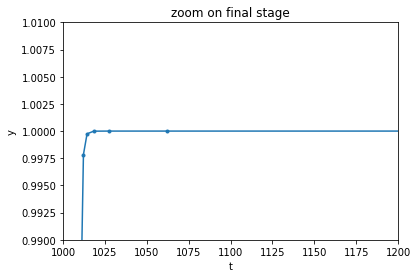

In [10]:
# flame ODE, with zoom, using Radau

delta = .001
tspan = (0, 2/delta)
yinit = [delta]

sol = integrate.solve_ivp(fun = flamef, t_span = tspan, y0 = yinit, method = 'Radau')

%matplotlib inline
plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('flame: ydot = y**2 - y**3,     %d steps' % len(sol.t))

plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.gca().set_ylim([0, .2])
plt.gca().set_xlim([850,1020])
plt.title('zoom on initial growth')

plt.figure()
plt.plot(sol.t, sol.y[0], '.-', label='ode solution')
plt.xlabel('t')
plt.ylabel('y')
plt.gca().set_ylim([0.99, 1.01])
plt.gca().set_xlim([1000,1200])
plt.title('zoom on final stage')